# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how="outer")

# Display the data table for preview
merged_data.head(4)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1


In [70]:
# Checking the number of mice.
unique_mice = merged_data['Mouse ID'].nunique()
print(f"Number of unique mice IDs: {unique_mice_count}")

Number of unique mice IDs: 249


In [71]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
print(dupe_mice)

['g989']


In [72]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'])]
print("Duplicate Rows:")
duplicate_rows.head()

Duplicate Rows:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [73]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.drop_duplicates(subset='Mouse ID', keep='first')
cleaned_data2=cleaned_data.iloc[1:]
unique_mice_count_cleaned = cleaned_data2['Mouse ID'].nunique()

In [74]:
# Checking the number of mice in the clean DataFrame.
print(f"Number of unique mice IDs after cleaning: {unique_mice_count_cleaned}")

Number of unique mice IDs after cleaning: 248


In [101]:

cleaned_data2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
50,s508,Ramicane,Male,1,17,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


## Summary Statistics

In [104]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


# grouping by drug regimen
drug_reg = merged_data.groupby('Drug Regimen')

# Math
mean_vol = drug_reg['Tumor Volume (mm3)'].mean()
median_vol = drug_reg['Tumor Volume (mm3)'].median()
var_vol = drug_reg['Tumor Volume (mm3)'].var()
std_vol = drug_reg['Tumor Volume (mm3)'].std()
sem_volume = drug_reg['Tumor Volume (mm3)'].sem()

# Creating df
summary_stats = pd.DataFrame({
    'Mean Tumor Volume': mean_vol,
    'Median Tumor Volume': median_vol,
    'Tumor Volume Variance': var_vol,
    'Tumor Volume Std. Dev.': std_vol,
    'Tumor Volume Std. Err.': sem_volume
}).reset_index()

# rounding values
summary_stats=round(summary_stats,2)

# Display df
print("Summary stats for tumor vol by 'Drug Regimen':")
summary_stats

Summary stats for tumor vol by 'Drug Regimen':


,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,40.68,41.56,24.95,4.99,0.33
1,Ceftamin,52.59,51.78,39.29,6.27,0.47
2,Infubinol,52.88,51.82,43.13,6.57,0.49
3,Ketapril,55.24,53.70,68.55,8.28,0.60
4,Naftisol,54.33,52.51,66.17,8.13,0.60
5,Placebo,54.03,52.29,61.17,7.82,0.58
6,Propriva,52.32,50.85,42.35,6.51,0.51
7,Ramicane,40.22,40.67,23.49,4.85,0.32
8,Stelasyn,54.23,52.43,59.45,7.71,0.57
9,Zoniferol,53.24,51.82,48.53,6.97,0.52


In [81]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# agg method

summary_agg = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Renaming columns
summary_agg = summary_agg.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Err.'
})

#Rounding values
summary_agg=round(summary_agg,2)

# Display df

print("Summary stats for tumor vol by 'Drug Regimen':")
summary_agg

Summary stats for tumor vol by 'Drug Regimen':


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

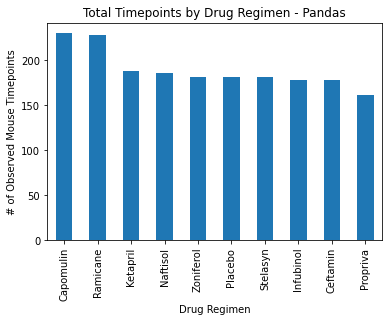

In [84]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_counts = merged_data['Drug Regimen'].value_counts()
drug_counts.plot(kind='bar', title='Total Timepoints by Drug Regimen - Pandas')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

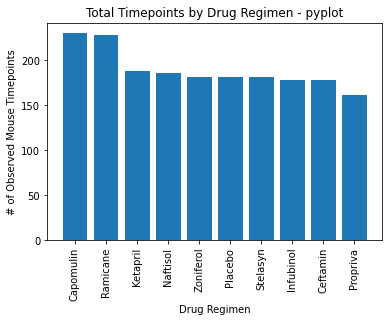

In [88]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_counts = merged_data['Drug Regimen'].value_counts()

plt.bar(drug_counts.index, drug_counts.values)
plt.title('Total Timepoints by Drug Regimen - pyplot')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation="vertical")
plt.show()

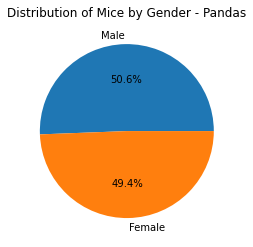

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_counts = merged_data['Sex'].value_counts()

gender_counts.plot(kind='pie', autopct='%1.1f%%', title='Distribution of Mice by Gender - Pandas')
plt.ylabel('')
plt.show()

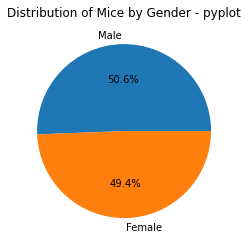

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_counts = merged_data['Sex'].value_counts()

plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Mice by Gender - pyplot')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


Capomulin Potential Outliers: []
Ramicane Potential Outliers: []
Infubinol Potential Outliers: [36.3213458]
Ceftamin Potential Outliers: []


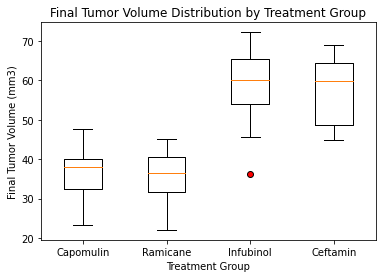

In [109]:
# Create a grouped DataFrame that shows the last (greatest) time point for each mouse
max_timepoints = merged_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this grouped DataFrame with the original cleaned DataFrame
merged_max_timepoints = pd.merge(max_timepoints, merged_data, on=['Mouse ID', 'Timepoint'])

# List of the four treatment groups
treatment_groups = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Empty list to hold tumor volume data
tumor_volume_data = []

# Calculate IQR and potential outliers for each treatment group
for group in treatment_groups:
    group_data = merged_max_timepoints[merged_max_timepoints['Drug Regimen'] == group]['Tumor Volume (mm3)']
    quartiles = group_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    outliers = group_data[(group_data < lower_bound) | (group_data > upper_bound)]
    print(f"{group} Potential Outliers: {outliers.tolist()}")
    tumor_volume_data.append(group_data)

# Create a box plot
plt.boxplot(tumor_volume_data, labels=treatment_groups, flierprops={'marker': 'o', 'markerfacecolor': 'red'})
plt.title('Final Tumor Volume Distribution by Treatment Group')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Treatment Group')
plt.show()


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


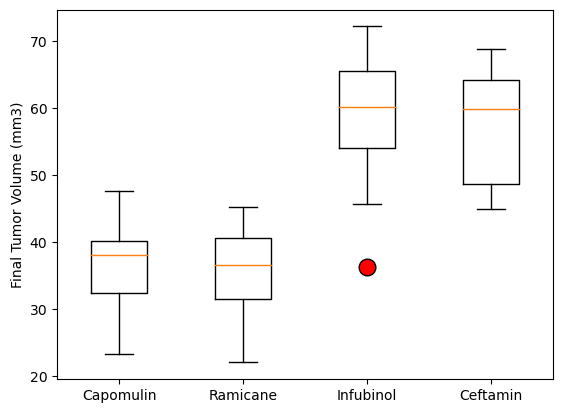

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

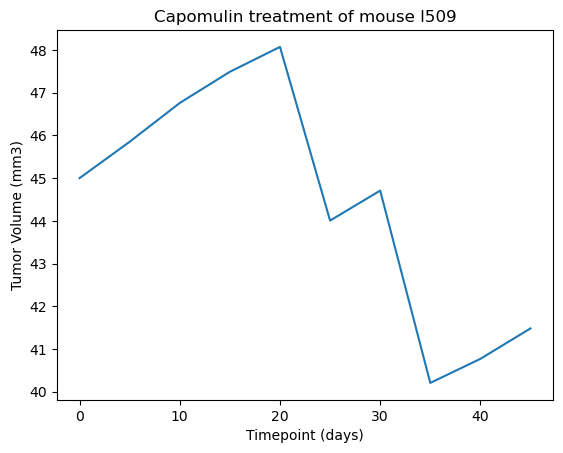

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


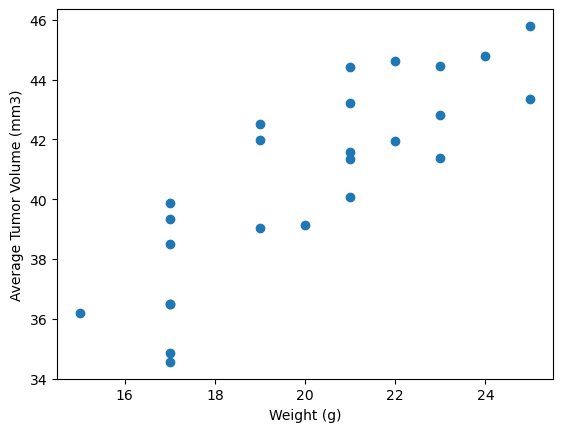

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


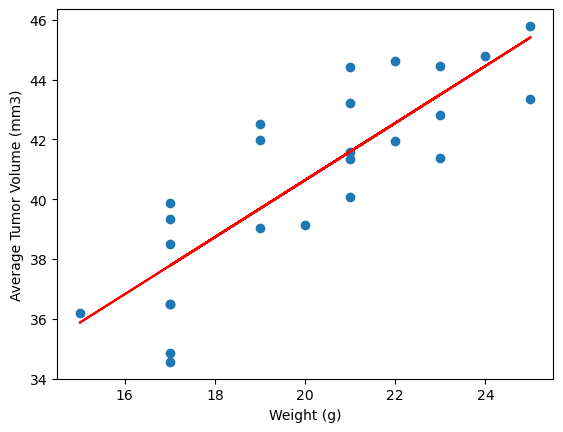

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
